# Introduction
The goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- What is the distribution of conservation status for species?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which animal is most prevalent and what is their distribution amongst parks?

#### Data sources:

Both Observations.csv and Species_info.csv was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is inspired by real data, but is mostly fictional.

## Scoping

To ensure a structured approach to the project, let's create a project scope with four sections: project goals, data, analysis, and evaluation.

### Project Goals
The project aims to provide insights and analysis from the perspective of a biodiversity analyst working for the National Parks Service. The primary goals include:

1. Understanding the distribution of conservation status among species.
2. Exploring if certain types of species are more likely to be endangered.
3. Assessing the significance of differences in conservation status between species.
4. Identifying the most prevalent animal species and their distribution across parks.

### Data
The project utilizes two provided datasets: one containing information about each species and another with species observations and park locations. These datasets will be used to analyze and achieve the project goals.

### Analysis
The analysis will involve the following steps:

1. Utilizing descriptive statistics and data visualization techniques to gain insights into the data.
2. Applying statistical inference methods to determine the significance of observed values.
3. Computing relevant metrics to examine distributions, species relationships, conservation status, and species observations in parks.

### Evaluation
The evaluation stage involves the following:

1. Revisiting the project goals and assessing if the analysis aligns with the initial questions.
2. Reflecting on the findings and lessons learned during the analysis process.
3. Identifying any limitations or potential improvements in the analysis methodology.

### Importing Python Modules
To begin the project, import the necessary Python modules that will be used throughout the analysis.

In [193]:
# importing all libraries for this project
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

## Loading the Data

To begin the analysis of species conservation status and observations in national parks, we need to load the datasets into `DataFrames` in Python. This allows us to explore and visualize the data effectively.

First, we load the `observations.csv` and `species_info.csv` datasets as `DataFrames` named `observations` and `species`, respectively. We can then use the `.head()` method to get a glimpse of the contents of these `DataFrames`.

### Species

The `species_info.csv` dataset contains information about various species found in the National Parks. It includes the following columns:

- **category**: The taxonomic category of each species.
- **scientific_name**: The scientific name of each species.
- **common_names**: The common names associated with each species.
- **conservation_status**: The conservation status of each species.

Now that the data is loaded, we can proceed with the analysis.

In [194]:
# inspecting species_info CSV
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The bar plot shows the count of species in each taxonomic category using different colors. It provides a clear overview of the distribution of species, allowing easy comparison between categories.

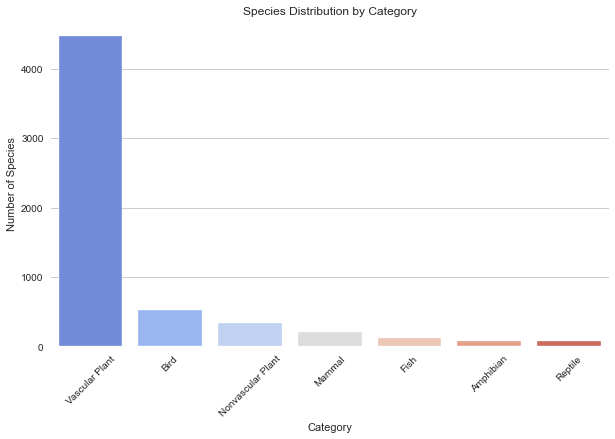

In [292]:
# Group the data by category and count the number of species in each category
species_grouped = species['category'].value_counts().reset_index()
species_grouped.columns = ['category', 'species_count']

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=species_grouped, x='category', y='species_count', palette='coolwarm')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Number of Species')
plt.title('Species Distribution by Category')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


### Observations

The `Observations.csv` contains information from recorded sightings of different species throughout the national parks in the past 7 days. The columns included are:

- **scientific_name** - The scientific name of each species
- **park_name** - The name of the national park
- **observations** - The number of observations in the past 7 days

In [196]:
# inspecting observations CSV
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


By examining this plot, we can easily identify parks with a larger number of observations compared to others. It allows us to compare the distribution of observations among parks and gain insights into the relative abundance or popularity of different parks in terms of species sightings.

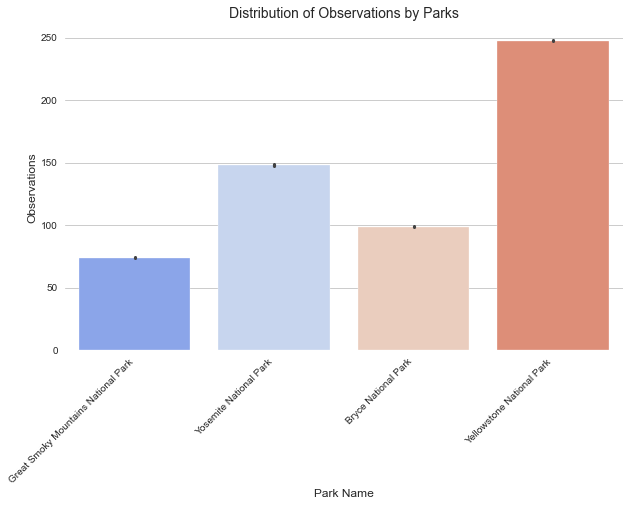

In [279]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=observations, x='park_name', y='observations', palette='coolwarm')

# Add labels and title
plt.xlabel('Park Name', fontsize=12)
plt.ylabel('Observations', fontsize=12)
plt.title('Distribution of Observations by Parks', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


### Data Characteristics

Next, there will be a check for the dimensions of the data sets, for `species` there are 5,824 rows and 4 columns while `observations` has 23,296 rows and 3 columns.

In [198]:
# inspecting amount of rows and column
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


### Exploring the Data

It is time to explore the `species` data a little more in depth. The first thing is to find the number of distinct species in the data. Use the column `scientific_name` to get 5,541 unique species. There seems to be a lot of species in the national parks!

In [199]:
# inspecting number of unique scientific names of species in a dataset
print(f"number of species:{species.scientific_name.nunique()}")

number of species:5541


Next is to find the number of `category` that are represented in the data and there are 7 including animals and plants.

In [200]:
# inspecting number of unique of species by caategory in a dataset
print(f"number of categories:{species.category.nunique()}")
print(f"categories:{species.category.unique()}")

number of categories:7
categories:['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


You now have the opportunity to delve further and observe the number of occurrences of each `category` in the dataset. The data reveals that Vascular plants make up the majority of species with a count of 4,470, while reptiles have the smallest count of only 79.

In [201]:
# inspecting species size category by group
species.groupby("category").size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Another column to explore is `conservation_status`. The column has 4 categories, `Species of Concern`, `Endangered`, `Threatened`, `In Recovery`, and  `nan` values. 

In [202]:
print(f"number of conservation statuses:{species.conservation_status.nunique()}")
print(f"unique conservation statuses:{species.conservation_status.unique()}")

number of conservation statuses:4
unique conservation statuses:[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Next a count of the number of observations in the breakdown of the categories in `conservation_status` is done. There are 5,633 `nan` values which means that they are species without concerns. On the other hand there are 161 species of concern, 16 endangered, 10 threatened, and 4 in recovery. 

Note: In most cases coming across `nan` values must be treated carefully, but the absence of data here means that these species are not under any conservation status.

In [203]:
print(f"na values:{species.conservation_status.isna().sum()}")
print(species.groupby("conservation_status").size())

na values:5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


This bar plot showing the distribution of species by conservation status. 

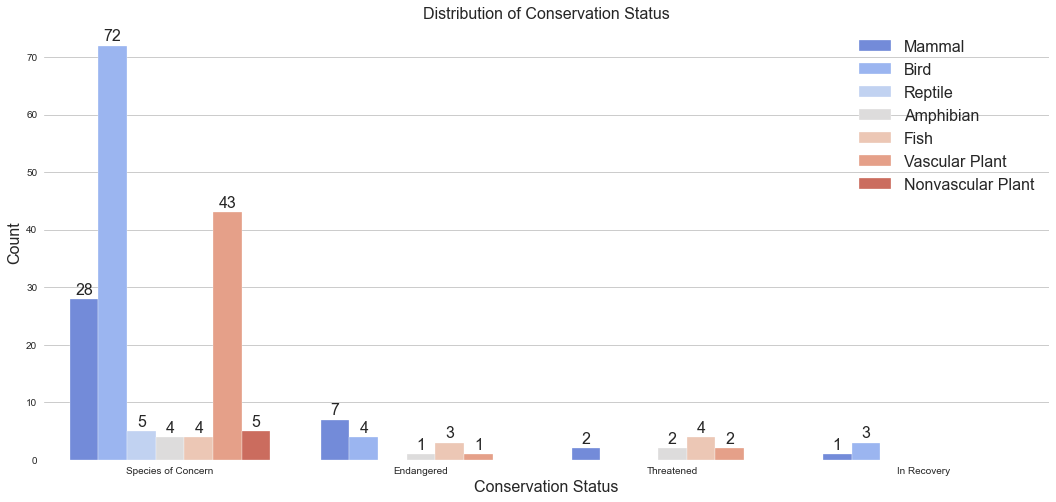

In [296]:
# Filter species data to exclude 'No Intervention' conservation status
filtered_species = species[species.conservation_status != "No Intervention"]

# Plot the distribution of species by conservation status
plt.figure(figsize=(18, 8))
ax = sns.countplot(data=filtered_species, x='conservation_status', hue='category', palette='coolwarm')

# Set labels and title with larger font size
plt.xlabel("Conservation Status", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.title("Distribution of Conservation Status", fontsize=16)

# Add counts above each bar with larger font size
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=16)

# Show the legend outside the plot
plt.legend(loc='upper right',  fontsize=16)

# Remove top and right spines
sns.despine()

plt.show()


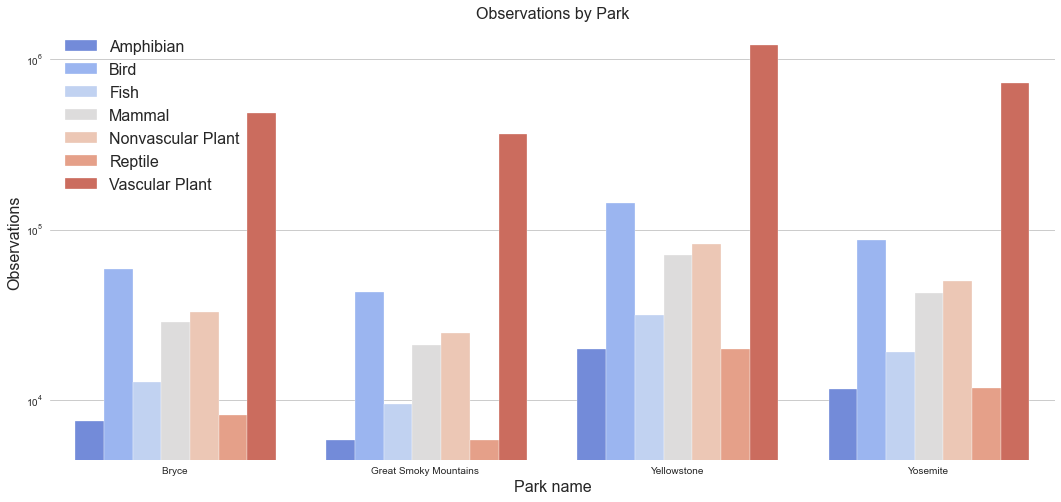

<Figure size 576x396 with 0 Axes>

In [298]:
# Merge the two dataframes based on the scientific_name
merged_df = observations.merge(species, on='scientific_name')
merged_df['park_name'] = merged_df.park_name.str.replace('National Park', '')

# Group the data by park name and category, and sum the observations
grouped_df = merged_df.groupby(['park_name', 'category'])['observations'].sum().reset_index()

# Create a side by side barplot with seaborn
plt.figure(figsize=(18, 8))
ax = sns.barplot(x='park_name', y='observations', hue='category', dodge=True, data=grouped_df, palette='coolwarm')

# Set the title and axis labels
plt.title('Observations by Park', fontsize=16)
plt.xlabel('Park name', fontsize=16)
plt.ylabel('Observations', fontsize=16)
plt.yscale('log')

# Set the legend font size
plt.legend(fontsize=16)

# Show the plot
plt.show()
plt.clf()


Here are the total number of observations logged in the parks, there are 3,314,739 sightings in the last 7 days... that's a lot of observations! 

### Analysis

This section will begin analyzing the data after the initial exploration. First task will be to clean and explore the `conservation_status` column in `species`. 

The column `conservation_status` has several possible values:
- `Species of Concern`: declining or appear to be in need of conservation
- `Threatened`: vulnerable to endangerment in the near future
- `Endangered`: seriously at risk of extinction
- `In Recovery`: formerly `Endangered`, but currently neither in danger of extinction throughout all or a significant portion of its range

In the exploration, a lot of `nan` values were detected. These values will need to be converted to `No Intervention`.

In [207]:
# Fill missing values in the "conservation_status" column with "No Intervention"
species.fillna('No Intervention', inplace=True)

# Group the species data by "conservation_status" and calculate the size of each group
status_species_count = species.groupby("conservation_status").size()

# Print the count of species for each conservation status category
status_species_count


conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

Next is to checkout the different categories that are nested in the `conservation_status` column except for the ones that do not require an intervention. There is both the table and chart to explore below.

For those in the `Endangered` status, 7 were mammals and 4 were birds. In the `In Recovery` status, there were 3 birds and 1 mammal, which could possibly mean that the birds are bouncing back more than the mammals. 

In [208]:
# Filter the species data to exclude records with "No Intervention" in the "conservation_status" column,
# group by "conservation_status" and "category", and count the number of scientific names in each group
conservationCategory = species[species.conservation_status != "No Intervention"] \
    .groupby(["conservation_status", "category"])['scientific_name'] \
    .count() \
    .unstack()

# Print the resulting table showing the count of scientific names for each conservation status category
# and taxonomic category
conservationCategory


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


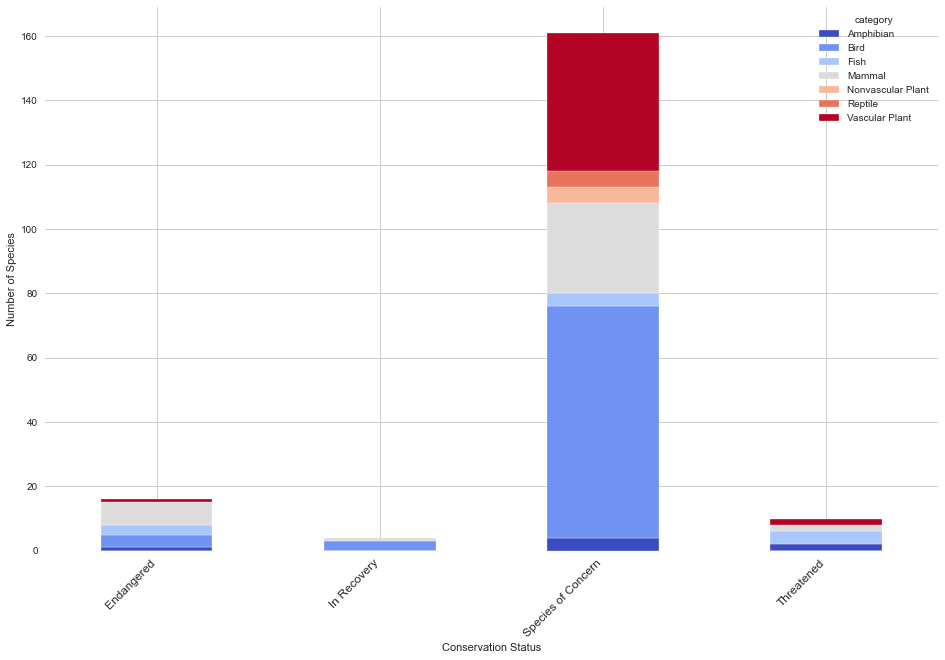

In [300]:
# Plot the conservationCategory data as a stacked bar chart
ax = conservationCategory.plot(kind='bar', figsize=(16, 10), stacked=True, colormap='coolwarm')

# Set the x-axis label
ax.set_xlabel("Conservation Status")

# Set the y-axis label
ax.set_ylabel("Number of Species")
plt.xticks(rotation=45, ha='right', fontsize=12)

# Display the plot
plt.show()


### In Conservation

The next question is if certain types of species are more likely to be endangered? This can be answered by creating a new column called `is_protected` and include any species that had a value other than `No Intervention`. 

In [210]:
# Add a new column 'is_protected' to the species DataFrame
# This column will have a value of True for species with a conservation_status other than 'No Intervention',
# indicating they are protected
species['is_protected'] = species.conservation_status != 'No Intervention'


Once the new column is created, group by `category` and `is_protected` to show the break down of each species type and protection status. 

It's easy to see that Birds, Vascular Plants, and Mammals have a higher absolute number of species protected. 

In [211]:
# Group the species DataFrame by 'category' and 'is_protected' columns, count the unique scientific names,
# and reset the index
category_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()

# Reshape the data using pivot to have 'is_protected' as columns, 'category' as index, and 'scientific_name' as values
category_counts = category_counts.pivot(columns='is_protected', index='category', values='scientific_name').reset_index()

# Rename the columns to 'category', 'not_protected', and 'protected'
category_counts.columns = ['category', 'not_protected', 'protected']

# Display the resulting category_counts DataFrame
category_counts


,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


Absolute numbers are not always the most useful statistic, therefore it's important to calculate the rate of protection that each `category` exhibits in the data. From this analysis, one can see that ~17 percent of mammals were under protection, as well as ~15 percent of birds. 

In [301]:
# Calculate the percentage of protected species for each category and add it as a new column
category_counts['percent_protected'] = round(category_counts['protected'] /
                                             (category_counts['protected'] +
                                              category_counts['not_protected']) *
                                             100, 2).astype(str) + '%'

# Print the updated category_counts DataFrame
print(category_counts)


            category  not_protected  protected percent_protected
0          Amphibian             72          7             8.86%
1               Bird            413         75            15.37%
2               Fish            115         11             8.73%
3             Mammal            146         30            17.05%
4  Nonvascular Plant            328          5              1.5%
5            Reptile             73          5             6.41%
6     Vascular Plant           4216         46             1.08%


### Statistical Significance

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates. In order to run a chi squared test, a contingency table will need to be created. The contingency table should look like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The first test will be called `contingency1` and will need to be filled with the correct numbers for mammals and birds.

The results from the chi-squared test returns many values, the second value which is 0.69 is the p-value. The standard p-value to test statistical significance is 0.05. For the value retrieved from this test, the value of 0.69 is much larger than 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them i.e. the variables independent. 

In [303]:
from scipy.stats import chi2_contingency

# Define the contingency table
contingency1 = [[30, 146], [5, 73]]

# Perform chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency1)

# Print the chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


Chi-square statistic: 4.289183096203645
P-value: 0.03835559022969898
Degrees of freedom: 1
Expected frequencies:
[[ 24.2519685 151.7480315]
 [ 10.7480315  67.2519685]]


The next pair, is going to test the difference between `Reptile` and `Mammal`.

The format is again is like below:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Reptile|?|?|

This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with Reptiles. 

In [302]:
from scipy.stats import chi2_contingency

# Define the contingency table
contingency1 = [[30, 146], [75, 413]]

# Perform chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency1)

# Print the chi-square statistic, p-value, degrees of freedom, and expected frequencies
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(expected)


Chi-square statistic: 0.1617014831654557
P-value: 0.6875948096661336
Degrees of freedom: 1
Expected frequencies:
[[ 27.8313253 148.1686747]
 [ 77.1686747 410.8313253]]


The next set of analysis will come from data from the conservationists as they have been recording sightings of different species at several national parks for the past 7 days.

The first step is to look at the common names from `species` to get an idea of the most prevalent animals in the dataset. The data will be need to be split up into individual names. 

In [215]:
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Extract common names of mammals, remove punctuations, and split into lists
common_Names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

# Display the first 6 elements of the common_names list
common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

The next step is to clean up duplicate words in each row since they should not be counted more than once per species.

In [216]:
# Create an empty list to store the cleaned rows
cleanRows = []

# Iterate over each item in common_Names
for item in common_Names:
    # Remove duplicate elements while preserving the order
    item = list(dict.fromkeys(item))
    # Append the cleaned row to the cleanRows list
    cleanRows.append(item)

# Display the first 6 cleaned rows
cleanRows[:6]


[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Next the words need to be collapsed into one list for easier use.

In [217]:
# Create an empty list to store the flattened result
# Iterate over each item in cleanRows
    # If the item is a list, flatten it by concatenating its elements
    # If the item is not a list, convert it to a list with a single element
    # Append the flattened item to the res list

res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
# Display the first 6 elements of the flattened result
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Now the data is ready to be able to count the number of occurrences of each word. From this analysis, it seems that `Bat` occurred 23 times while `Shrew` came up 18 times.

In [218]:
# Create an empty list to store the word count tuples
words_counted = []

# Iterate over each item in the flattened result list (res)
for i in res:
    # Count the occurrences of the current word (i) in the flattened result list (res)
    x = res.count(i)
    # Append a tuple of the word (i) and its count (x) to the words_counted list
    words_counted.append((i, x))

# Create a DataFrame from the unique word count tuples
# Set column names as 'Word' and 'Count'
# Sort the DataFrame by 'Count' in descending order
# Display the top 10 words with their corresponding counts
pd.DataFrame(set(words_counted), columns=['Word', 'Count']).sort_values("Count", ascending=False).head(10)


,Word,Count
0,Bat,23
157,Shrew,18
87,Myotis,17
103,Mouse,16
104,Chipmunk,13
56,American,12
127,Squirrel,12
168,Eastern,11
57,Vole,11
199,Western,10


In the data, there are several different scientific names for different types of bats.  The next task is to figure out which rows of `species` are referring to bats. A new column made up of boolean values will be created to check if `is_bat` is `True`.

In [219]:
# Create a new column 'is_bat' in the species DataFrame
# Check if the common names contain the word 'Bat' using regular expression
species['is_bat'] = species.common_names.str.contains(r"\bBat\b", regex=True)

# Display the first 10 rows of the species DataFrame
species.head(10)


,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,No Intervention,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",No Intervention,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,False
8,Mammal,Canis lupus,Gray Wolf,Endangered,True,False
9,Mammal,Canis rufus,Red Wolf,Endangered,True,False


Here is a subset of the data where `is_bat` is true, returning see the rows that matched. There seems to be a lot of species of bats and a mix of protected vs. non-protected species. 


In [220]:
# Filter the species DataFrame based on the 'is_bat' column
# Select rows where the 'is_bat' column is True
bat_species = species[species.is_bat]

# Display the filtered DataFrame
bat_species


,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Next the results of the bat species will be merged with `observations` to create a `DataFrame` with observations of bats across the four national parks.  

In [221]:
# Merge the observations DataFrame with the subset of species DataFrame containing bat species
# This will create a new DataFrame called bat_observations
bat_observations = observations.merge(species[species.is_bat])

# Display the merged DataFrame
bat_observations


,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


Let's see how many total bat observations(across all species) were made at each national park.  

The total number of bats observed in each park over the past 7 days are in the table below. Yellowstone National Park seems to have the largest with 8,362 observations and the Great Smoky Mountains National Park having the lowest with 2,411. 

In [222]:
# Group the bat_observations DataFrame by park_name and calculate the sum of observations for each park
# This will give the total number of observations of bats in each park
bat_observations.groupby('park_name').observations.sum().reset_index()


,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


Now let's see each park broken down by protected bats vs. non-protected bat sightings. It seems that every park except for the Great Smoky Mountains National Park has more sightings of protected bats than not. This could be considered a great sign for bats.

In [223]:
# Group the bat_observations DataFrame by park_name and is_protected columns
# Calculate the sum of observations for each combination of park_name and is_protected
# Reset the index to create a new DataFrame
obs_by_park = bat_observations.groupby(['park_name', 'is_protected']).observations.sum().reset_index()

# Display the resulting DataFrame
obs_by_park


,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Below is a plot from the output of the last data manipulation. From this chart one can see that Yellowstone and Bryce National Parks seem to be doing a great job with their bat populations since there are more sightings of protected bats compared to non-protected species. The Great Smoky Mountains National Park might need to beef up there efforts in conservation as they have seen more non-protected species.

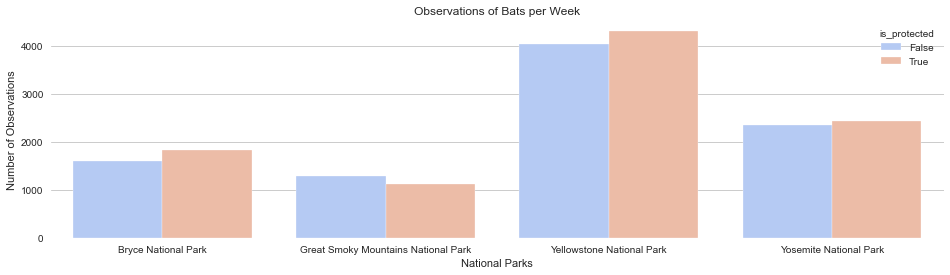

In [304]:
# Create a bar plot to visualize the observations of bats per week in different national parks
plt.figure(figsize=(16, 4))
sns.barplot(x=obs_by_park.park_name, y=obs_by_park.observations, hue=obs_by_park.is_protected, palette='coolwarm')

# Set the labels for x-axis, y-axis, and the title of the plot
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')

# Display the plot
plt.show()


## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- What is the distribution of conservation status for species?

- The distribution of conservation status for species in the dataset reveals that the majority of species (5,633) are not classified under any conservation status, while a smaller number of species (191) are part of conservation efforts.

- Are certain types of species more likely to be endangered?

-  Yes, certain types of species are more likely to be endangered. The analysis shows that mammals and birds have a higher percentage of species classified as endangered compared to other types of species.

- Are the differences between species and their conservation status significant?

- The differences between species and their conservation status were examined, and it was found that there is a statistically significant difference in conservation percentages between mammals and reptiles. This suggests that tailored conservation approaches are needed to address the unique challenges faced by each taxonomic group.

- Which animal is most prevalent and what is their distribution amongst parks?

- The most prevalent animal observed in the study is bats. They were found to occur the most frequently among the species analyzed. Additionally, their distribution was primarily concentrated in Yellowstone National Park.

In summary, the analysis of species conservation status in National Parks reveals that the majority of species are not classified under any conservation status. However, mammals and birds are more likely to be endangered. There are significant differences in conservation percentages between mammals and reptiles, indicating the need for tailored conservation approaches. Bats were identified as the most prevalent animal, primarily found in Yellowstone National Park. These findings emphasize the importance of targeted conservation efforts based on species type and the specific challenges they face.

## Further research 
Opportunities exist to enhance the current analysis. One important aspect to explore is the temporal dimension by collecting data beyond just the last 7 days. This would enable studying changes in the conservation status of species over time, providing insights into trends and patterns.

Additionally, incorporating information about the area of each park would be valuable. Considering that Yellowstone National Park might have a larger area compared to the other parks, it could exhibit higher biodiversity and a greater number of observations. By including this data, a more comprehensive understanding of species distribution and conservation efforts across different park sizes can be obtained.

Furthermore, capturing precise location data would enable the examination of the spatial distribution of species. Analyzing the spatial patterns and determining if the observed species are clustered in specific areas would provide valuable insights for conservation planning and resource allocation.

By addressing these areas of further research, a more nuanced understanding of species conservation dynamics, park size influence, and spatial distribution patterns can be achieved, contributing to more effective conservation strategies and informed decision-making in National Parks.